# Distortion Correction Maps

<script src="https://cdn.jsdelivr.net/gh/plexoos/pub-docs@0be43f5/assets/ipynb.js"></script>
 
<a id="toggle_all_input" href="#" data-show-input="false" onclick="toggleAllInput(this); return false;">Show/Hide input</a>

##  $E \times B$ distortion due to the shape of the magnetic field

The following describes how the distortion correction due to the shape of the magnetic field
is implemented in the tpc-rs library. Specifically, we refer here to the Distorter class of
tpc-rs in v0.2.0. For details see the actuall code at
https://github.com/BNLNPPS/tpc-rs/blob/v0.2.0/include/tpcrs/detail/distorter.h

This implementation assumes a homogeneous electric field within the TPC.

The Simpson's integration rule is used to calculate the corrections via the integrals over $z$

\begin{align}
\delta_x &= c_2 \int \frac{B_x}{B_z} - c_1 \int \frac{B_y}{B_z} \\
\delta_y &= c_1 \int \frac{B_y}{B_z} + c_2 \int \frac{B_x}{B_z}
\end{align}

The number of steps (at least 5) is chosen dynamicaly based on the step size that is required to be at most 1cm.

The calculation depends on the following constants:

\begin{align}
c_1 &= \frac{T_1 \omega\tau }{ 1. + T_1^2 \omega^2 \tau^2 } \\
c_2 &= \frac{T_2^2 \omega^2 \tau^2 }{ 1 + T_2^2 \omega^2 \tau^2 }
\end{align}


$$
\omega\tau =  B_z \frac{-10.0 v_d}{E_z} 
$$

The electric field magnitude $E$ is given by 

$$
E_z = \frac{ |V_c - V_{gg}| }{ \Delta_z }
$$

where $V_c$ and $V_{gg}$ are the voltages on the cathode and gating grid respectively, and $\Delta_z$ is the distance between them.

In this implementation $\delta_z$ corrections are expected to be negligible.


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/dsmirnov/work/tpc-rs/data/distort3.dat", sep='\s+', names=['r', 'p', 'z', 'corrr', 'corrp', 'corrz'])
#df
df = df.round({'corrz': 4})
#df.nunique()

In [3]:
def plot_corr_slice(ax, df):
    ax = ax.ravel()
    assert len(ax) >= 3, "expected three axes"

    r = df.r.unique()
    p = df.p.unique()
    z = df.z.unique()
 
    if len(z) == 1:
        xx, yy = np.meshgrid(p, r)
        xlabel = '$\phi$'
        ylabel = 'r, cm'
        title  = f'z = {z[0]}'
    elif len(p) == 1:
        xx, yy = np.meshgrid(z, r)
        xlabel = 'z, cm'
        ylabel = 'r, cm'
        title  = f'p = {p[0]}'
    elif len(r) == 1:
        xx, yy = np.meshgrid(z, p)
        xlabel = 'z, cm'
        ylabel = '$\phi$'
        title  = f'r = {r[0]}'

    for i, var in enumerate(['corrr', 'corrp', 'corrz']):
        a = ax[i]
        pcm = a.pcolormesh(xx, yy, df[var].values.reshape(xx.shape))
        a.set_xlabel(xlabel)
        a.set_ylabel(ylabel)
        a.set_title(f'{var[-1]} component, {title}')
        a.grid(True)
        cb = fig.colorbar(pcm, ax=a, pad=0.1)
        cb.ax.set_xlabel('$\delta$, cm')

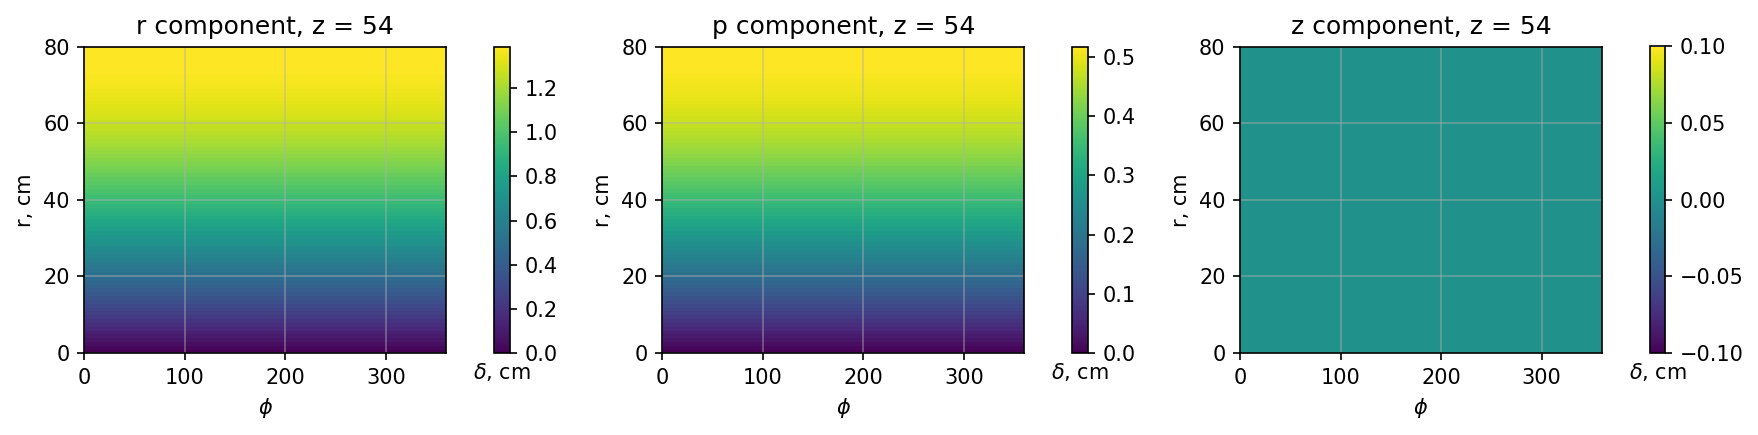

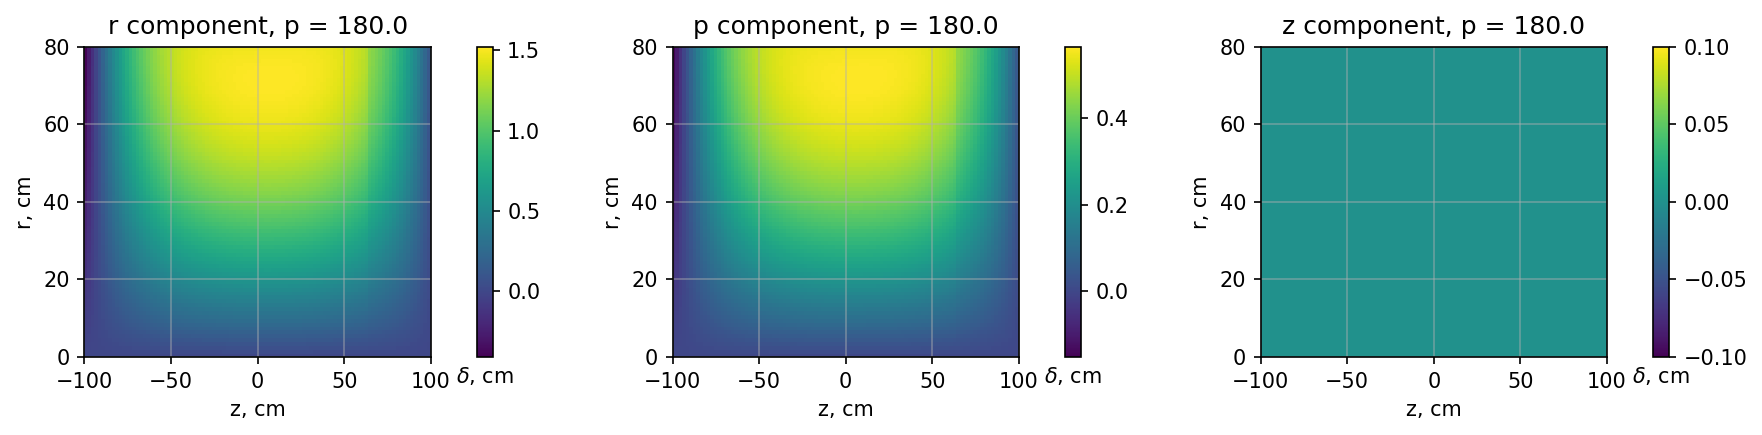

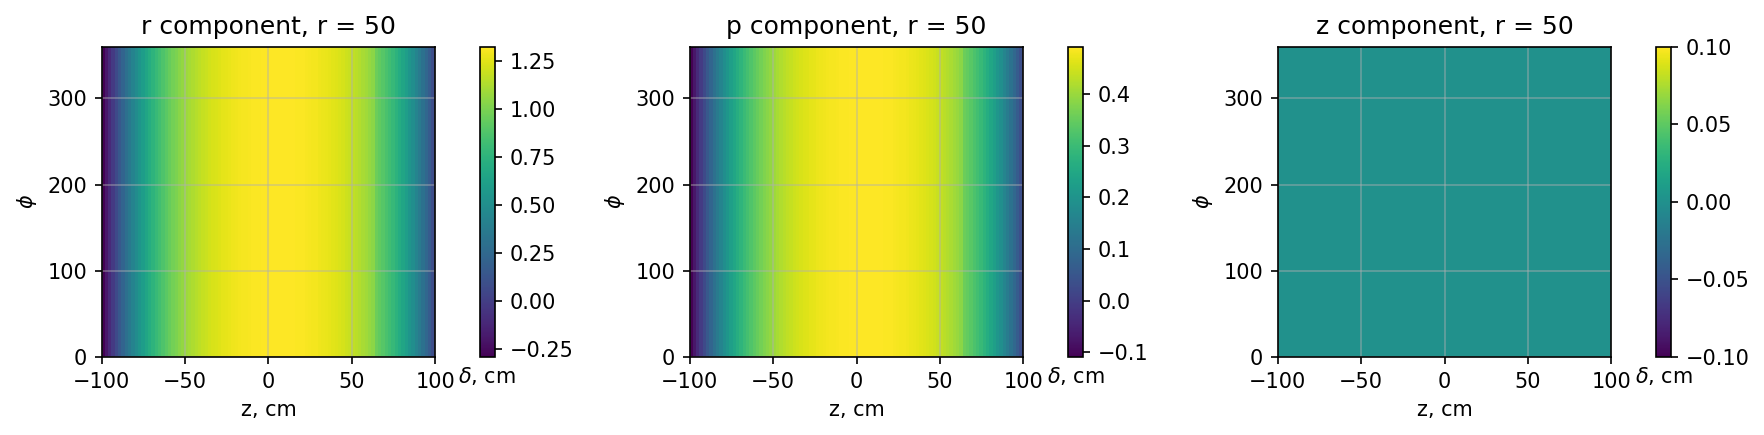

In [4]:
#subplot_kw = dict(projection='polar')
subplot_kw = {}

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3), subplot_kw=subplot_kw)
df_slice = df.loc[(df.z == 54)]
plot_corr_slice(ax, df_slice)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3), subplot_kw=subplot_kw)
df_slice = df.loc[(df.p == 180)]
plot_corr_slice(ax, df_slice)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3), subplot_kw=subplot_kw)
df_slice = df.loc[(df.r == 50)]
plot_corr_slice(ax, df_slice)
plt.tight_layout()
plt.show()

In [5]:
def plot_corr(ax, df):
    ax = ax.ravel()
    assert len(ax) >= 3, "expected three axes"

    r = df.r.unique()
    p = df.p.unique()
    z = df.z.unique()
 
    if len(z) == 1 and len(p) == 1:
        xlabel = 'r, cm'
        ylabel = '$\delta$, cm'
        title  = f'p = {p[0]} and z = {z[0]}'

    for i, var in enumerate(['corrr', 'corrp', 'corrz']):
        a = ax[i]
        pcm = a.plot(r, df[var])
        a.set_xlabel(xlabel)
        a.set_ylabel(ylabel)
        a.set_title(f'{var[-1]} component, {title}')
        a.grid(True)

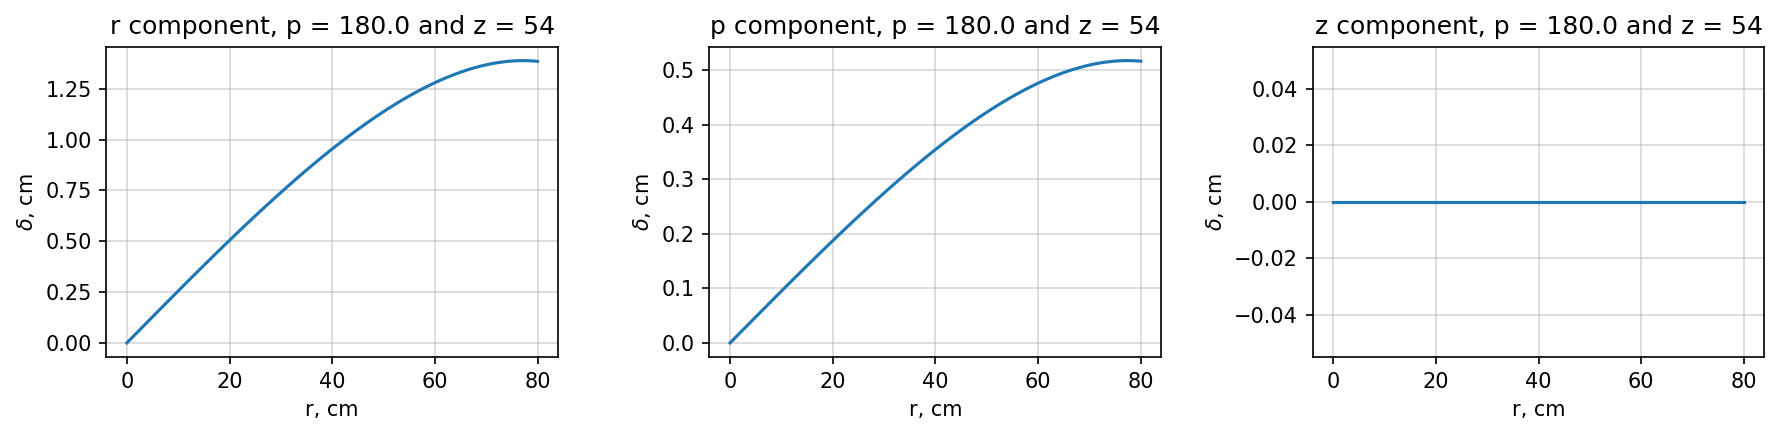

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
df_slice = df.loc[(df.z == 54) & (df.p == 180)]
plot_corr(ax, df_slice)
plt.tight_layout()
plt.show()